# Download the data

In [53]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



# Take a Quick Look at the Data Structure

- Head
- Info
- Describe
- Histogram on numerical features

In [8]:
# Your code
data = load_housing_data()

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c9c8048>,
      dtype=object)

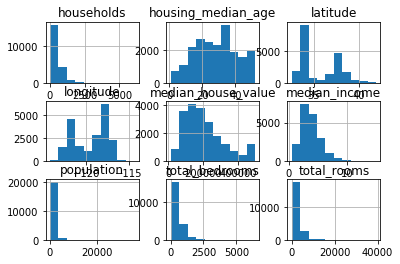

In [13]:
data.hist()


In [15]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [18]:
# Your code
from sklearn.model_selection import train_test_split

cols = [x for x in data.columns.values if x!= "median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(data[cols], data["median_house_value"], test_size=0.2)

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

In [22]:
# Your code
BBox = ((data.longitude.min(),data.longitude.max(),data.latitude.min(),data.latitude.max()))
BBox

(-124.35, -114.31, 32.54, 41.95)

In [33]:
import matplotlib.pyplot as plt
map_= plt.imread('california.png')

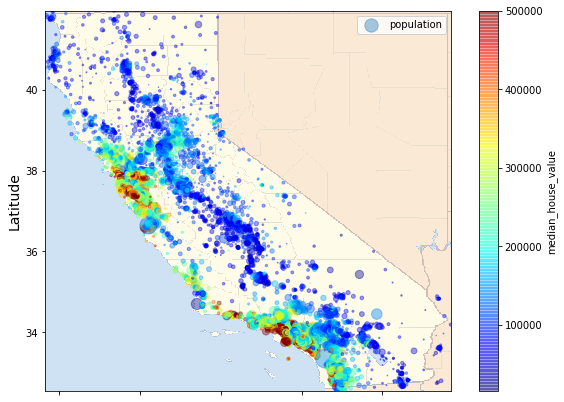

In [34]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,s=data['population']/100, label='population', figsize=(10,7),c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(map_, extent=[-124.35, -114.31, 32.54, 41.95], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

## Looking for Correlations

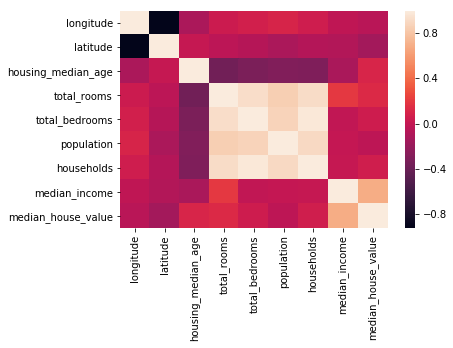

In [38]:
# Your code
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

## Experimenting with Feature Engineering

Try to think of new features more useful than some that already exist. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

In [39]:
# Your code
data["rooms_households"] = data["total_rooms"]/data["households"]

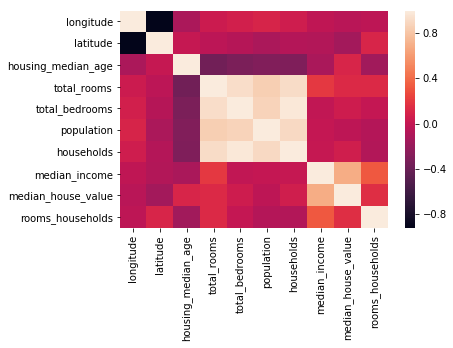

In [40]:
# Check the correlation with the new features
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Data Preparation

## Variable Encoding

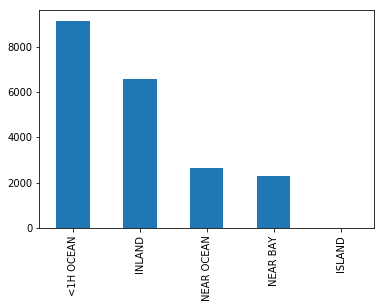

In [42]:
#Your code
data.ocean_proximity.value_counts().plot.bar()

In [44]:
data_dummy = pd.get_dummies(data,'ocean_proximity', drop_first=True)

In [46]:
data_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_households,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0,0,1,0


## Data Cleaning (missing values handling)

In [13]:
# Check a class called Imputer in Scikit Learn with parameter "median"

In [59]:
# Your code
data_dummy = data_dummy.fillna(data_dummy.median())


In [61]:
data_dummy.head()
data_dummy.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
rooms_households              0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

## Feature engineering

In [15]:
# Add the features that you discovered before

In [16]:
# Your code


## Feature Scaling

In [62]:
# Check StandardScaler in Scikit Learn
from sklearn.preprocessing import StandardScaler

In [65]:
# your code
scaler = StandardScaler()
scaler.fit(data_dummy)
scaler.mean_
scaler.transform(data_dummy)

/Users/julieG/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/julieG/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

# Select and Train a Model

## Training and Evaluating on the Training Set

Try :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
(check Scikit Learn)


With Performance Metric = RMSE

## Model Evaluation Using Cross-Validation

Check from sklearn.model_selection import cross_val_score

In [68]:
cols = [x for x in data_dummy.columns.values if x!= "median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(data_dummy[cols], data_dummy["median_house_value"], test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model_1.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)